In [1]:
## Import the Libraries

In [2]:
import os
import random
import numpy as np
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

from ipywidgets import widgets

2026-02-16 15:04:44.266698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771254284.426455      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771254284.472915      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771254284.861183      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771254284.861223      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771254284.861226      24 computation_placer.cc:177] computation placer alr

In [3]:
TRAIN_DIR = "/kaggle/input/datasets/lordtesla77/horse-or-human/Files/horse-or-human"
VAL_DIR = "/kaggle/input/datasets/lordtesla77/validation/Files/validation-horse-or-human"

print(f"files in the current directory : {os.listdir()}")

print(f"\n subdirectories within '{TRAIN_DIR}' dir: {os.listdir(TRAIN_DIR)}")
print(f"\n subdirectories within '{VAL_DIR}' dir: {os.listdir(VAL_DIR)}")

files in the current directory : ['__notebook__.ipynb']

 subdirectories within '/kaggle/input/datasets/lordtesla77/horse-or-human/Files/horse-or-human' dir: ['humans', 'horses']

 subdirectories within '/kaggle/input/datasets/lordtesla77/validation/Files/validation-horse-or-human' dir: ['humans', 'horses']


In [4]:
train_horse_dir = os.path.join(TRAIN_DIR,'horses')
train_human_dir = os.path.join(TRAIN_DIR,'humans')
val_horse_dir = os.path.join(VAL_DIR , 'horses')
val_human_dir = os.path.join(VAL_DIR , 'humans')



In [5]:
print(f"total training horse images: {len(os.listdir(train_horse_dir))}")
print(f"total training human images: {len(os.listdir(train_human_dir))}")
print(f"total training Validation horse images: {len(os.listdir(val_horse_dir))}")
print(f"total training Validation human images: {len(os.listdir(val_human_dir))}")

total training horse images: 500
total training human images: 527
total training Validation horse images: 128
total training Validation human images: 128


In [6]:
#Building a Small Model from Scratch
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    # First Convolution
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Third Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fourth Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # #Fifth Convolution
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

I0000 00:00:1771254298.433404      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771254298.439204      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,667,169 (6.36 MB)

 Trainable params: 1,667,169 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.001),
             metrics=["accuracy"])

In [9]:
# Data Preprocessing
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size =(150,150),
    batch_size = 32,
    label_mode = 'binary'
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size =(150,150),
    batch_size = 32,
    label_mode = 'binary'
)
# Check the type
dataset_type = type(train_dataset)
print(f"train_dataset inherits from tf.data .Dataset:{issubclass(dataset_type,tf.data.Dataset)}")

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.
train_dataset inherits from tf.data .Dataset:True


In [10]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)
#Rescale the image using a lambda function
train_dataset_scaled = train_dataset.map(lambda image,label:(rescale_layer(image),label))
val_dataset_scaled = val_dataset.map(lambda image,label:(rescale_layer(image),label))

In [11]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )
val_dataset_final = (val_dataset_scaled
                       .cache()
                       
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

In [12]:
# Training
history = model.fit(
    train_dataset_final,
    epochs = 15,
    validation_data = val_dataset_final,
    verbose = 2
)

Epoch 1/15


I0000 00:00:1771254306.316523      70 service.cc:152] XLA service 0x7bafb403c650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771254306.316561      70 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771254306.316565      70 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771254306.659110      70 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-16 15:05:08.296528: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-16 15:05:08.436286: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1771254310.161698      70 device_co

33/33 - 11s - 328ms/step - accuracy: 0.6446 - loss: 0.6642 - val_accuracy: 0.5000 - val_loss: 1.6227
Epoch 2/15
33/33 - 0s - 12ms/step - accuracy: 0.8208 - loss: 0.4040 - val_accuracy: 0.9023 - val_loss: 0.3232
Epoch 3/15
33/33 - 0s - 12ms/step - accuracy: 0.9250 - loss: 0.1748 - val_accuracy: 0.8867 - val_loss: 0.5297
Epoch 4/15
33/33 - 0s - 12ms/step - accuracy: 0.9552 - loss: 0.1252 - val_accuracy: 0.8711 - val_loss: 0.6354
Epoch 5/15
33/33 - 0s - 12ms/step - accuracy: 0.9611 - loss: 0.1126 - val_accuracy: 0.8945 - val_loss: 0.7167
Epoch 6/15
33/33 - 0s - 12ms/step - accuracy: 0.9747 - loss: 0.0604 - val_accuracy: 0.9414 - val_loss: 0.2961
Epoch 7/15
33/33 - 0s - 12ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.8828 - val_loss: 1.2135
Epoch 8/15
33/33 - 0s - 12ms/step - accuracy: 0.9903 - loss: 0.0400 - val_accuracy: 0.8867 - val_loss: 1.0857
Epoch 9/15
33/33 - 0s - 12ms/step - accuracy: 0.9786 - loss: 0.1352 - val_accuracy: 0.8867 - val_loss: 0.9064
Epoch 10/15
33/33 -

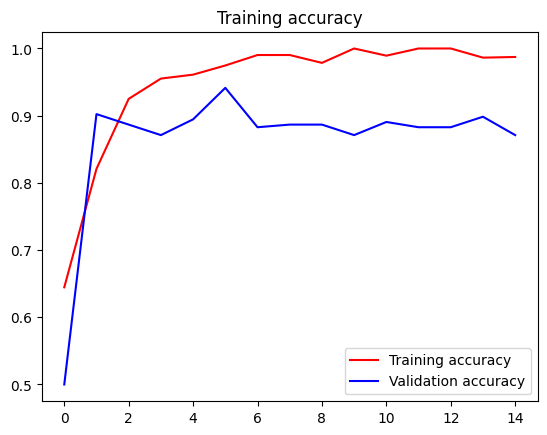

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.show()

In [14]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()